##  Random forest

## Fraud-Check Data
### Use Random Forest to prepare a model on Fraud Data 
**Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Importing Data

In [2]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data['Taxable.Income']=fraud_data['Taxable.Income'].apply(lambda x: 'Risky' if x<=30000 else 'Good')
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


## 3. Data Understanding 

### 3.1 Initial Analysis

In [4]:
fraud_data.shape

(600, 6)

In [5]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income     object
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600,600.000000,600.000000,600
unique,2,3,2,NaN,NaN,2
top,YES,Single,Good,NaN,NaN,YES
freq,312,217,476,NaN,NaN,302
mean,NaN,NaN,NaN,108747.368333,15.558333,NaN
std,NaN,NaN,NaN,49850.075134,8.842147,NaN
min,NaN,NaN,NaN,25779.000000,0.000000,NaN
25%,NaN,NaN,NaN,66966.750000,8.000000,NaN
50%,NaN,NaN,NaN,106493.500000,15.000000,NaN
75%,NaN,NaN,NaN,150114.250000,24.000000,NaN


### 3.2 Data Visualization 

#### Checking Normality and Outlers

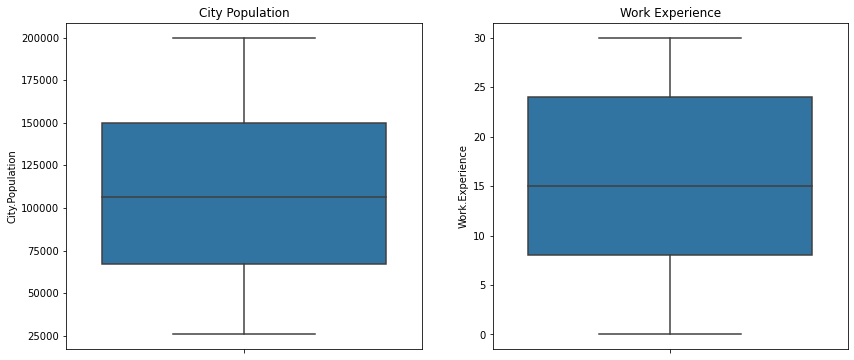

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y='City.Population',data=fraud_data)
plt.title('City Population')
plt.subplot(1,2,2)
sns.boxplot(y='Work.Experience',data=fraud_data)
plt.title('Work Experience')
plt.show()

#### Plot for Categorical Variables

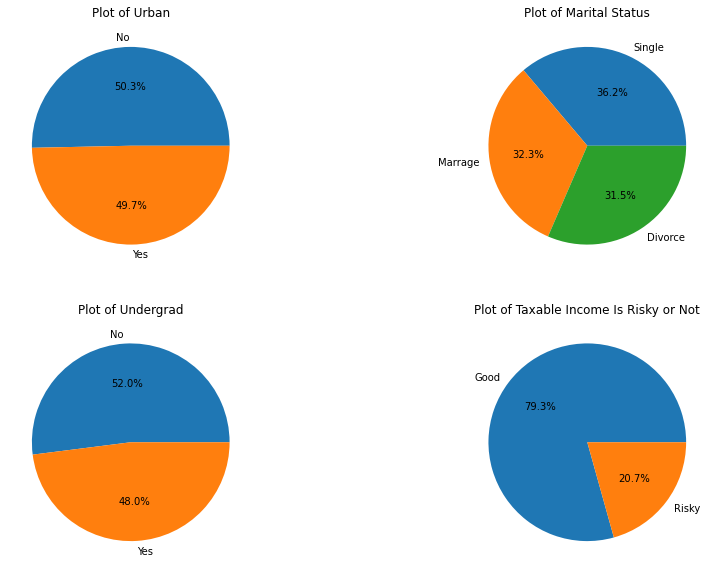

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.pie(x=fraud_data['Urban'].value_counts(), labels=['No','Yes'], autopct='%2.1f%%')
plt.title('Plot of Urban')
plt.subplot(2,2,2)
plt.pie(x=fraud_data['Marital.Status'].value_counts(), labels=['Single','Marrage','Divorce'], autopct='%2.1f%%')
plt.title('Plot of Marital Status')
plt.subplot(2,2,3)
plt.pie(x=fraud_data['Undergrad'].value_counts(), labels=['No','Yes'], autopct='%2.1f%%')
plt.title('Plot of Undergrad')
plt.subplot(2,2,4)
plt.pie(x=fraud_data['Taxable.Income'].value_counts(), labels=['Good','Risky'], autopct='%2.1f%%')
plt.title('Plot of Taxable Income Is Risky or Not')
plt.show()

## 4. Data Preparation 

In [10]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [11]:
le=LabelEncoder()
fraud_data[['Undergrad','Marital.Status','Taxable.Income','Urban']]=fraud_data[['Undergrad','Marital.Status','Taxable.Income','Urban']].apply(le.fit_transform)
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


## 5. Model Building

In [12]:
X= fraud_data.drop('Taxable.Income', axis=1)
y=fraud_data[['Taxable.Income']]

In [13]:
X.shape, y.shape

((600, 5), (600, 1))

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10, shuffle=True, stratify=y)

In [15]:
X_train.shape, y_train.shape

((480, 5), (480, 1))

In [16]:
X_test.shape, y_test.shape

((120, 5), (120, 1))

## 6. Model Training 

In [17]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

## 7. Model Testing || 8. Model Evaluation

### For training data

In [18]:
y_pred_train=rf_classifier.predict(X_train)

In [19]:
print('Accuracy Score        :', accuracy_score(y_train, y_pred_train))
print('Classification Report :\n', classification_report(y_train, y_pred_train))
print('Confusion Matrix      :\n', confusion_matrix(y_train, y_pred_train))

Accuracy Score        : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00        99

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

Confusion Matrix      :
 [[381   0]
 [  0  99]]


### For testing data

In [20]:
y_pred_test=rf_classifier.predict(X_test)

In [21]:
print('Accuracy Score        :', accuracy_score(y_test, y_pred_test))
print('Classification Report :\n', classification_report(y_test, y_pred_test))
print('Confusion Matrix      :\n', confusion_matrix(y_test, y_pred_test))

Accuracy Score        : 0.75
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        95
           1       0.14      0.04      0.06        25

    accuracy                           0.75       120
   macro avg       0.47      0.49      0.46       120
weighted avg       0.65      0.75      0.69       120

Confusion Matrix      :
 [[89  6]
 [24  1]]


#### Random Forest is working pretty well for our data but facing overfit problem

##### Let's do pruning using GridSearch CV

In [22]:
grid_search=GridSearchCV(estimator=rf_classifier,
                         param_grid={'criterion':['entropy','gini'],
                                     'max_depth':[2,3,4,5,6,7,8,9,10]})
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 2}
0.7933333333333332


In [23]:
rf_classifier=RandomForestClassifier(criterion='entropy', max_depth=2)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2)

## 7. Model testing || 8. Model Evaluation 

### For training data

In [24]:
y_pred_train=rf_classifier.predict(X_train)

In [25]:
print('Accuracy Score        :', accuracy_score(y_train, y_pred_train))
print('Classification Report :\n', classification_report(y_train, y_pred_train))
print('Confusion Matrix      :\n', confusion_matrix(y_train, y_pred_train))

Accuracy Score        : 0.79375
Classification Report :
               precision    recall  f1-score   support

           0       0.79      1.00      0.89       381
           1       0.00      0.00      0.00        99

    accuracy                           0.79       480
   macro avg       0.40      0.50      0.44       480
weighted avg       0.63      0.79      0.70       480

Confusion Matrix      :
 [[381   0]
 [ 99   0]]


### For testing data

In [26]:
y_pred_test=rf_classifier.predict(X_test)

In [27]:
print('Accuracy Score        :', accuracy_score(y_test, y_pred_test))
print('Classification Report :\n', classification_report(y_test, y_pred_test))
print('Confusion Matrix      :\n', confusion_matrix(y_test, y_pred_test))

Accuracy Score        : 0.7916666666666666
Classification Report :
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120

Confusion Matrix      :
 [[95  0]
 [25  0]]


#### We have sort the overfitting problem